# Helper Functions

In [ ]:
#@title global vars
from google.colab import userdata

token = userdata.get('HF_TOKEN')

# base_model = "black-forest-labs/FLUX.1-schnell"
base_model = "black-forest-labs/FLUX.1-dev"

cache_directory = root_path + "/hf_cache"

In [ ]:
#@title visualization
from PIL import Image
import matplotlib.pyplot as plt

def display_image(image, title):
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

def compare_images(images, titles):
    fig, axes = plt.subplots(1, len(images), figsize=(20, 10))
    for ax, img, title in zip(axes, images, titles):
        ax.imshow(img)
        ax.set_title(title)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

def save_image(image, filename, webp_output=False):
    if webp_output:
        image.save(filename + "_img.webp", format="webp")
    else:
        image.save(filename + "_img.png", format="PNG")

    print(f"Image saved as {filename}")

def visualize_mask(mask_path):
    mask = plt.imread(mask_path)
    # Show the mask
    plt.imshow(mask, cmap='gray')
    plt.axis('off')
    plt.show()

# Run!

In [ ]:
#@title Try FluxPipeline
import torch
import numpy as np
from diffusers import FluxPipeline

pipe = FluxPipeline.from_pretrained(base_model,
                                    torch_dtype=torch.float16,
                                    cache_dir=cache_directory,
                                    token=token)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


In [ ]:
pipe.to("cuda")
# pipe.enable_model_cpu_offload()

FluxPipeline {
  "_class_name": "FluxPipeline",
  "_diffusers_version": "0.32.1",
  "_name_or_path": "black-forest-labs/FLUX.1-dev",
  "feature_extractor": [
    null,
    null
  ],
  "image_encoder": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "FlowMatchEulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "T5EncoderModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "T5TokenizerFast"
  ],
  "transformer": [
    "diffusers",
    "FluxTransformer2DModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [ ]:
def run_pipeline(prompt, guidance_scale, num_inference_steps, seed, height, width):
    output_image = pipe(
        prompt=prompt,
        height=height,
        width=width,
        guidance_scale=guidance_scale,
        num_inference_steps=num_inference_steps,
        generator=torch.manual_seed(seed)
    ).images[0]

    return output_image

## variety - resolutions

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["ful glance, standing tall, crossed arms. the background is a grand royal hall with tall columns, banners, and a regal throne. late afternoon light shining through stained - glass windows. a gentle, painterly illustration style reminiscent of early disney concept art and mary blair's whimsical color palette, with a soft watercolor texture and pastel tones. a storybook medieval kingdom in a european - inspired setting."]


  0%|          | 0/25 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["ful glance, standing tall, crossed arms. the background is a grand royal hall with tall columns, banners, and a regal throne. late afternoon light shining through stained - glass windows. a gentle, painterly illustration style reminiscent of early disney concept art and mary blair's whimsical color palette, with a soft watercolor texture and pastel tones. a storybook medieval kingdom in a european - inspired setting."]


  0%|          | 0/25 [00:00<?, ?it/s]

`height` and `width` have to be divisible by 16 but are 1080 and 1920. Dimensions will be resized accordingly
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["ful glance, standing tall, crossed arms. the background is a grand royal hall with tall columns, banners, and a regal throne. late afternoon light shining through stained - glass windows. a gentle, painterly illustration style reminiscent of early disney concept art and mary blair's whimsical color palette, with a soft watercolor texture and pastel tones. a storybook medieval kingdom in a european - inspired setting."]


  0%|          | 0/25 [00:00<?, ?it/s]

`height` and `width` have to be divisible by 16 but are 1920 and 1080. Dimensions will be resized accordingly
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["ful glance, standing tall, crossed arms. the background is a grand royal hall with tall columns, banners, and a regal throne. late afternoon light shining through stained - glass windows. a gentle, painterly illustration style reminiscent of early disney concept art and mary blair's whimsical color palette, with a soft watercolor texture and pastel tones. a storybook medieval kingdom in a european - inspired setting."]


  0%|          | 0/25 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["ful glance, standing tall, crossed arms. the background is a grand royal hall with tall columns, banners, and a regal throne. late afternoon light shining through stained - glass windows. a gentle, painterly illustration style reminiscent of early disney concept art and mary blair's whimsical color palette, with a soft watercolor texture and pastel tones. a storybook medieval kingdom in a european - inspired setting."]


  0%|          | 0/25 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["ful glance, standing tall, crossed arms. the background is a grand royal hall with tall columns, banners, and a regal throne. late afternoon light shining through stained - glass windows. a gentle, painterly illustration style reminiscent of early disney concept art and mary blair's whimsical color palette, with a soft watercolor texture and pastel tones. a storybook medieval kingdom in a european - inspired setting."]


  0%|          | 0/25 [00:00<?, ?it/s]

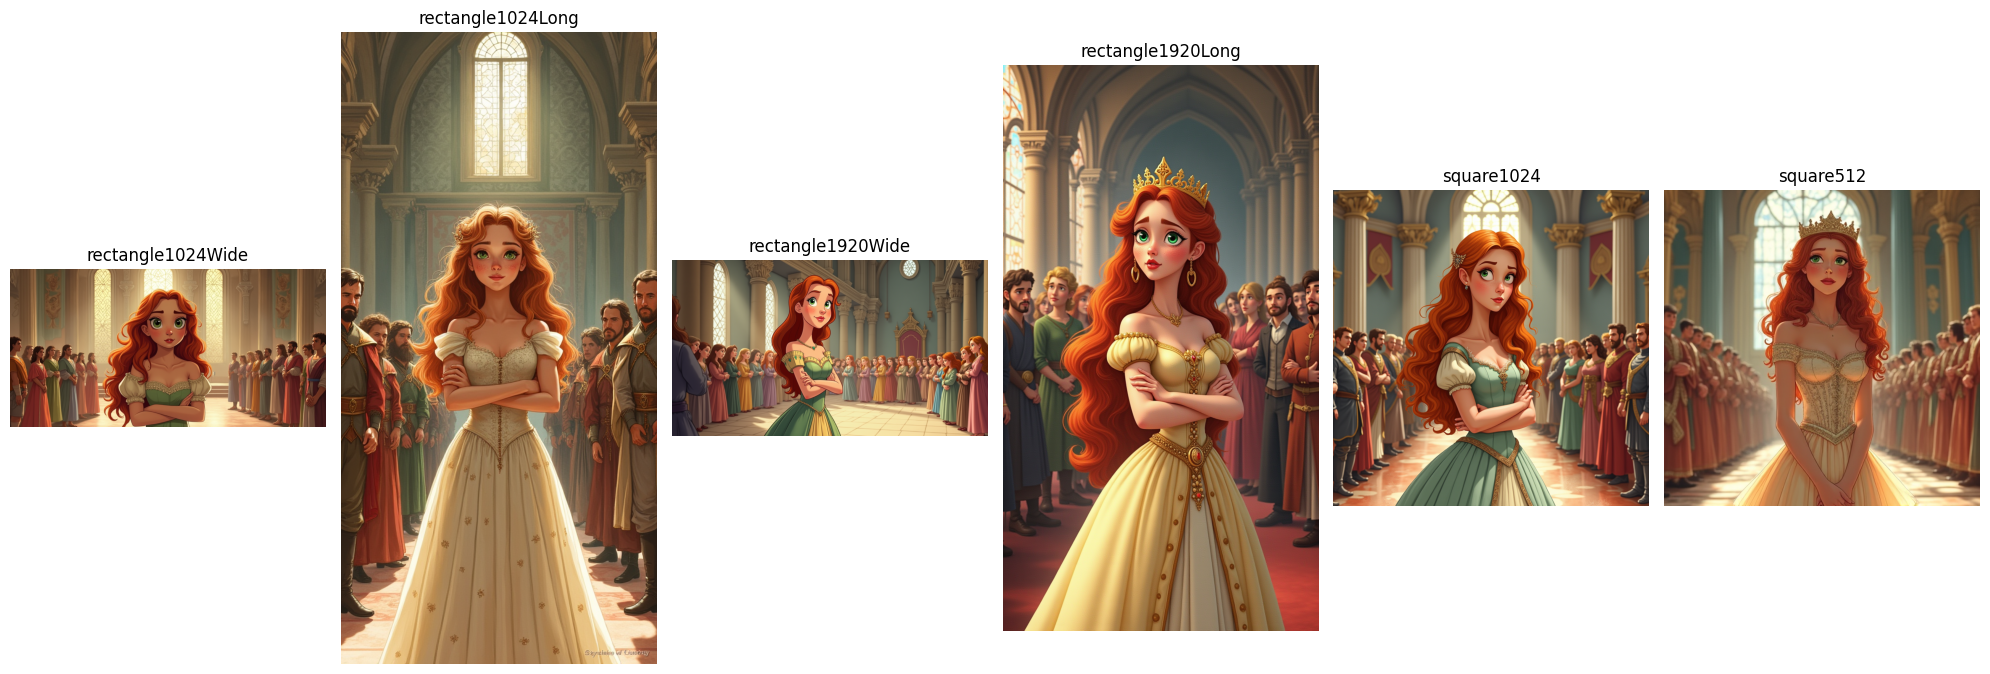

In [ ]:
prompt = (
    "A princess, radiant but haughty, stands in the royal hall, dismissing rows of noble suitors. Medium shot capturing the princess in the foreground and suitors lined up in the background."
    "The princess, long and wavy auburn hair with gentle curls, large green eyes, faint freckles, regal gown in gentle pastel colors with subtle intricate patterns.She slightly smug, disdainful glance, standing tall, crossed arms."
    "The background is a grand royal hall with tall columns, banners, and a regal throne. Late afternoon light shining through stained-glass windows."
    "A gentle, painterly illustration style reminiscent of early Disney concept art and Mary Blair's whimsical color palette, with a soft watercolor texture and pastel tones. A storybook medieval kingdom in a European-inspired setting."
)
guidance_scale = 3.5
num_inference_steps = 25
seed = 425533035839096

rectangle1024Wide = run_pipeline(prompt, guidance_scale, num_inference_steps, seed, 512, 1024)
rectangle1024Long = run_pipeline(prompt, guidance_scale, num_inference_steps, seed, 1024, 512)
rectangle1920Wide = run_pipeline(prompt, guidance_scale, num_inference_steps, seed, 1080, 1920)
rectangle1920Long = run_pipeline(prompt, guidance_scale, num_inference_steps, seed, 1920, 1080)
square1024 = run_pipeline(prompt, guidance_scale, num_inference_steps, seed, 1024, 1024)
square512 = run_pipeline(prompt, guidance_scale, num_inference_steps, seed, 512, 512)

compare_images([
    rectangle1024Wide,
    rectangle1024Long,
    rectangle1920Wide,
    rectangle1920Long,
    square1024,
    square512
], [
    "rectangle1024Wide",
    "rectangle1024Long",
    "rectangle1920Wide",
    "rectangle1920Long",
    "square1024",
    "square512"
])



## variety - prompts separations

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["ful glance, standing tall, crossed arms. the background is a grand royal hall with tall columns, banners, and a regal throne. late afternoon light shining through stained - glass windows. a gentle, painterly illustration style reminiscent of early disney concept art and mary blair's whimsical color palette, with a soft watercolor texture and pastel tones. a storybook medieval kingdom in a european - inspired setting."]


  0%|          | 0/25 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["ful glance, standing tall, crossed arms. the background is a grand royal hall with tall columns, banners, and a regal throne. late afternoon light shining through stained - glass windows. a gentle, painterly illustration style reminiscent of early disney concept art and mary blair's whimsical color palette, with a soft watercolor texture and pastel tones. a storybook medieval kingdom in a european - inspired setting."]


  0%|          | 0/25 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["ful glance, standing tall, crossed arms. the background is a grand royal hall with tall columns, banners, and a regal throne. late afternoon light shining through stained - glass windows. a gentle, painterly illustration style reminiscent of early disney concept art and mary blair's whimsical color palette, with a soft watercolor texture and pastel tones. a storybook medieval kingdom in a european - inspired setting."]


  0%|          | 0/25 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["expression is slightly smug as she dismissively regards a line of noble suitors in the background. the hall features tall columns, decorative banners, and a majestic throne. the style is gentle and painterly, reminiscent of early disney concept art and mary blair's use of soft watercolor textures and pastel tones, evoking a storybook medieval kingdom in a european - inspired setting."]


  0%|          | 0/25 [00:00<?, ?it/s]

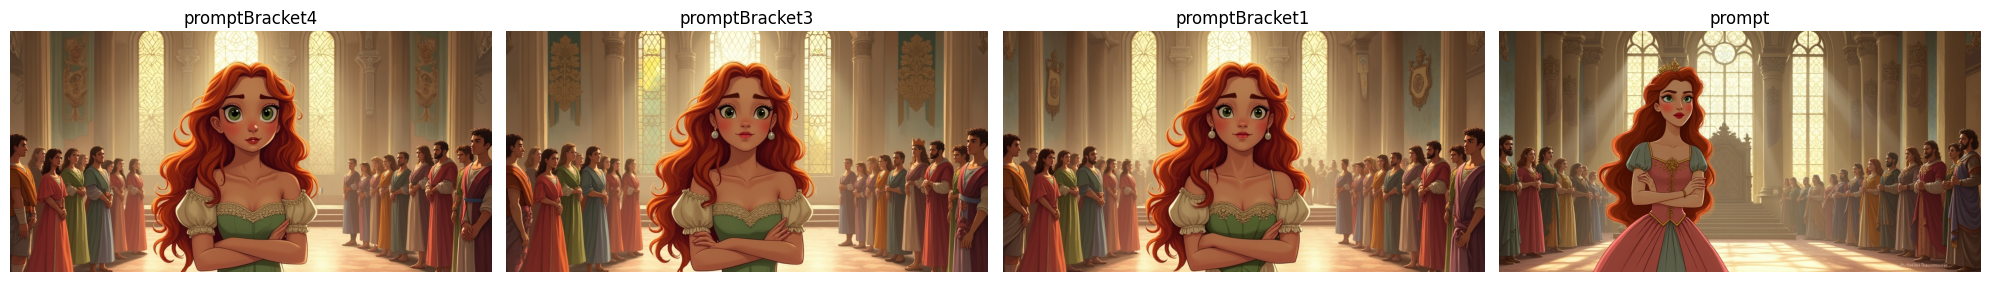

In [ ]:
promptBracket4 = (
    "A princess, radiant but haughty, stands in the royal hall, dismissing rows of noble suitors. Medium shot capturing the princess in the foreground and suitors lined up in the background."
    "The princess, long and wavy auburn hair with gentle curls, large green eyes, faint freckles, regal gown in gentle pastel colors with subtle intricate patterns.She slightly smug, disdainful glance, standing tall, crossed arms."
    "The background is a grand royal hall with tall columns, banners, and a regal throne. Late afternoon light shining through stained-glass windows."
    "A gentle, painterly illustration style reminiscent of early Disney concept art and Mary Blair's whimsical color palette, with a soft watercolor texture and pastel tones. A storybook medieval kingdom in a European-inspired setting."
)

promptBracket3 = (
    "A princess, radiant but haughty, stands in the royal hall, dismissing rows of noble suitors. Medium shot capturing the princess in the foreground and suitors lined up in the background. The princess, long and wavy auburn hair with gentle curls, large green eyes, faint freckles, regal gown in gentle pastel colors with subtle intricate patterns.She slightly smug, disdainful glance, standing tall, crossed arms."
    "The background is a grand royal hall with tall columns, banners, and a regal throne. Late afternoon light shining through stained-glass windows."
    "A gentle, painterly illustration style reminiscent of early Disney concept art and Mary Blair's whimsical color palette, with a soft watercolor texture and pastel tones. A storybook medieval kingdom in a European-inspired setting."
)

promptBracket1 = (
    "A princess, radiant but haughty, stands in the royal hall, dismissing rows of noble suitors. Medium shot capturing the princess in the foreground and suitors lined up in the background. The princess, long and wavy auburn hair with gentle curls, large green eyes, faint freckles, regal gown in gentle pastel colors with subtle intricate patterns.She slightly smug, disdainful glance, standing tall, crossed arms. The background is a grand royal hall with tall columns, banners, and a regal throne. Late afternoon light shining through stained-glass windows. A gentle, painterly illustration style reminiscent of early Disney concept art and Mary Blair's whimsical color palette, with a soft watercolor texture and pastel tones. A storybook medieval kingdom in a European-inspired setting."
)

prompt = (
    "Imagine a scene in a grand royal hall during late afternoon, where light filters through stained-glass windows, creating a whimsical atmosphere. In the foreground, a princess with long, wavy auburn hair, large green eyes, and faint freckles stands prominently. She wears a regal gown in pastel colors with subtle, intricate patterns. Her posture is confident, with arms crossed, and her expression is slightly smug as she dismissively regards a line of noble suitors in the background. The hall features tall columns, decorative banners, and a majestic throne. The style is gentle and painterly, reminiscent of early Disney concept art and Mary Blair's use of soft watercolor textures and pastel tones, evoking a storybook medieval kingdom in a European-inspired setting."
)

guidance_scale = 3.5
num_inference_steps = 25
seed = 425533035839096

promptBracket4 = run_pipeline(promptBracket4, guidance_scale, num_inference_steps, seed, 1024, 1024)
promptBracket3 = run_pipeline(promptBracket3, guidance_scale, num_inference_steps, seed, 1024, 1024)
promptBracket1 = run_pipeline(promptBracket1, guidance_scale, num_inference_steps, seed, 1024, 1024)
prompt = run_pipeline(prompt, guidance_scale, num_inference_steps, seed, 1024, 1024)

compare_images([
    promptBracket4,
    promptBracket3,
    promptBracket1,
    prompt
], [
    "promptBracket4",
    "promptBracket3",
    "promptBracket1",
    "prompt"
])



## variety - use long clip model + resolution

In [ ]:
from transformers import CLIPModel, CLIPProcessor, CLIPConfig

clip_model_id = ("zer0int/LongCLIP-GmP-ViT-L-14")
config = CLIPConfig.from_pretrained(clip_model_id)
config.text_config.max_position_embeddings = 248
clip_model = CLIPModel.from_pretrained(clip_model_id, torch_dtype=torch.float16, config=config)
clip_processor = CLIPProcessor.from_pretrained(clip_model_id, padding="max_length", max_length=248)

pipe.tokenizer = clip_processor.tokenizer  # Replace with the CLIP tokenizer
pipe.text_encoder = clip_model.text_model  # Replace with the CLIP text encoder
pipe.tokenizer_max_length = 248
pipe.text_encoder.dtype = torch.float16

pipe.to("cuda")

config.json:   0%|          | 0.00/746 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/335 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/907 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

`height` and `width` have to be divisible by 16 but are 1080 and 1920. Dimensions will be resized accordingly


  0%|          | 0/25 [00:00<?, ?it/s]

`height` and `width` have to be divisible by 16 but are 1920 and 1080. Dimensions will be resized accordingly


  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

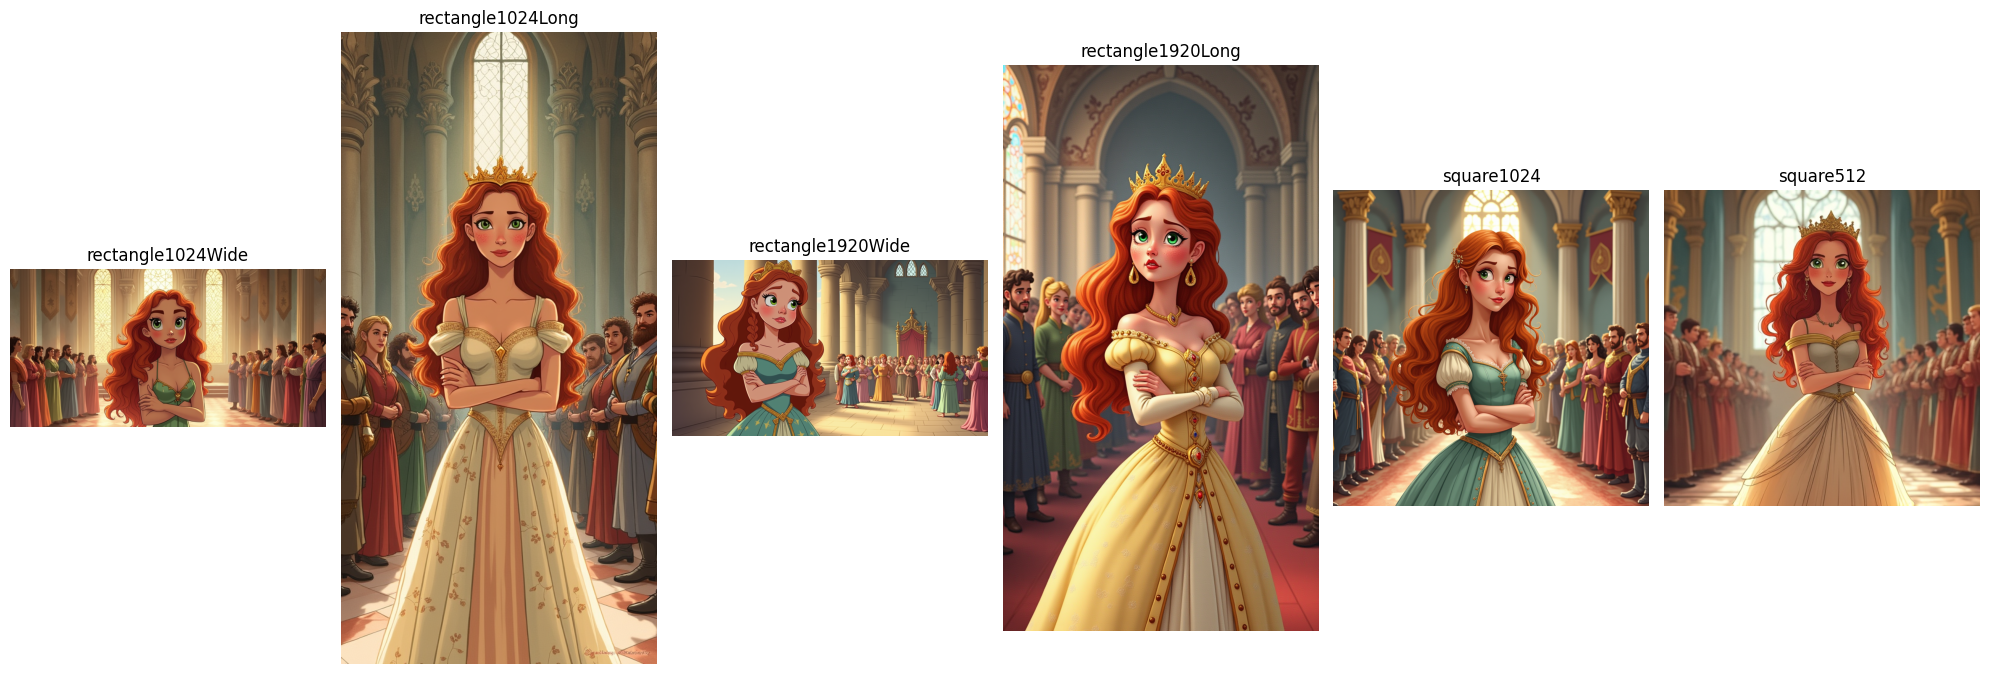

In [ ]:
prompt = (
    "A princess, radiant but haughty, stands in the royal hall, dismissing rows of noble suitors. Medium shot capturing the princess in the foreground and suitors lined up in the background."
    "The princess, long and wavy auburn hair with gentle curls, large green eyes, faint freckles, regal gown in gentle pastel colors with subtle intricate patterns.She slightly smug, disdainful glance, standing tall, crossed arms."
    "The background is a grand royal hall with tall columns, banners, and a regal throne. Late afternoon light shining through stained-glass windows."
    "A gentle, painterly illustration style reminiscent of early Disney concept art and Mary Blair's whimsical color palette, with a soft watercolor texture and pastel tones. A storybook medieval kingdom in a European-inspired setting."
)
guidance_scale = 3.5
num_inference_steps = 25
seed = 425533035839096

def run_pipeline(prompt, guidance_scale, num_inference_steps, seed, height, width):
    output_image = pipe(
        prompt=prompt,
        height=height,
        width=width,
        guidance_scale=guidance_scale,
        num_inference_steps=num_inference_steps,
        generator=torch.manual_seed(seed)
    ).images[0]

    return output_image

rectangle1024Wide = run_pipeline(prompt, guidance_scale, num_inference_steps, seed, 512, 1024)
rectangle1024Long = run_pipeline(prompt, guidance_scale, num_inference_steps, seed, 1024, 512)
rectangle1920Wide = run_pipeline(prompt, guidance_scale, num_inference_steps, seed, 1080, 1920)
rectangle1920Long = run_pipeline(prompt, guidance_scale, num_inference_steps, seed, 1920, 1080)
square1024 = run_pipeline(prompt, guidance_scale, num_inference_steps, seed, 1024, 1024)
square512 = run_pipeline(prompt, guidance_scale, num_inference_steps, seed, 512, 512)

compare_images([
    rectangle1024Wide,
    rectangle1024Long,
    rectangle1920Wide,
    rectangle1920Long,
    square1024,
    square512
], [
    "rectangle1024Wide",
    "rectangle1024Long",
    "rectangle1920Wide",
    "rectangle1920Long",
    "square1024",
    "square512"
])

